In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
#import tensorflow as tf
from scipy.stats import norm
#from sklearn.mixture import GaussianMixture as GMM
from scipy import stats
import json

In [9]:
def get_dict_from_file(file_name, window, step_sizes, restriction):
    """
    Reads in dictionary of H values.
    """
    with open('h_dict_'+'w{}_'.format(window)+'s{}_'.format(max(step_sizes))+'r{}_'.format(restriction)+file_name, 'r') as file:
        h_dict = file.read()
    
    return json.loads(h_dict)


def plot_hist_2d(file_name, window, all_step_sizes, step_sizes_plot, restriction, nbins):
    """
    """
    h_dict = get_dict_from_file(file_name, window, all_step_sizes, restriction)
    
    cmap = plt.cm.plasma
    
    for s in step_sizes_plot:
        plt.hist(h_dict[str(s)], nbins, density=True, histtype='step', label='step size {}'.format(s),
                 color=cmap((s-1)/len(all_step_sizes)))
    plt.legend(loc='upper left')
    plt.xlabel('H')
    plt.ylabel('p(H)')
    plt.title(file_name)

    
def subplot_hist_2d(file_name, window, all_step_sizes, step_sizes_plot, restriction, nbins, pos):
    """
    """
    i, j = pos
    
    h_dict = get_dict_from_file(file_name, window, all_step_sizes, restriction)
    
    cmap = plt.cm.plasma
    
    for s in step_sizes_plot:
        ax[i,j].hist(h_dict[str(s)], nbins, density=True, histtype='step', label='step size {}'.format(s),
                color=cmap((s-1)/len(all_step_sizes)))
    ax[i,j].legend(loc='upper left')
    ax[i,j].set_xlabel('H')
    ax[i,j].set_ylabel('p(H)')
    ax[i,j].set_title(file_name)

In [10]:
filenames_control = np.array(['Control_frame001-200', 'Control_frame200-400', 'Control_frame400-600', 'Control_frame600-800',
                              'Control_frame800-1000', 'Control_frame1000-1200'])
filenames_mutant = np.array(['LanB1_frame001-200', 'LanB1_frame200-400', 'LanB1_frame400-600', 'LanB1_frame600-800',
                             'LanB1_frame800-1000', 'LanB1_frame1000-1200'])
filenames_defmutant = np.array(['defLanB1_300817_frame200-400', 'defLanB1_300817_frame400-600'])

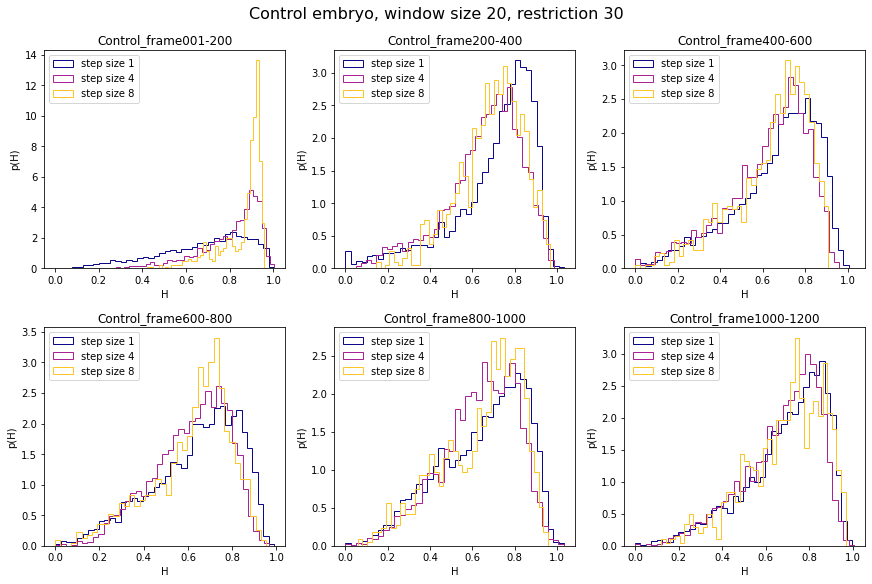

In [41]:
# Control embryo 2D histogram plots

window = 20
step_sizes = [1,2,3,4,5,6,7,8]
plot_ss = [1,4,8]
restriction = 30
nbins = 40

fig, ax = plt.subplots(2, 3, figsize=(12, 8), constrained_layout=True)

fig.suptitle("Control embryo, window size "+str(window)+", restriction "+str(restriction), fontsize=16)

subplot_hist_2d(filenames_control[0], window, step_sizes, plot_ss, restriction, nbins, [0,0])
subplot_hist_2d(filenames_control[1], window, step_sizes, plot_ss, restriction, nbins, [0,1])
subplot_hist_2d(filenames_control[2], window, step_sizes, plot_ss, restriction, nbins, [0,2])
subplot_hist_2d(filenames_control[3], window, step_sizes, plot_ss, restriction, nbins, [1,0])
subplot_hist_2d(filenames_control[4], window, step_sizes, plot_ss, restriction, nbins, [1,1])
subplot_hist_2d(filenames_control[5], window, step_sizes, plot_ss, restriction, nbins, [1,2])

plt.savefig("hist_2d_Control_w{}_s{}_r{}_n{}".format(window, max(step_sizes), restriction, nbins), dpi=300)

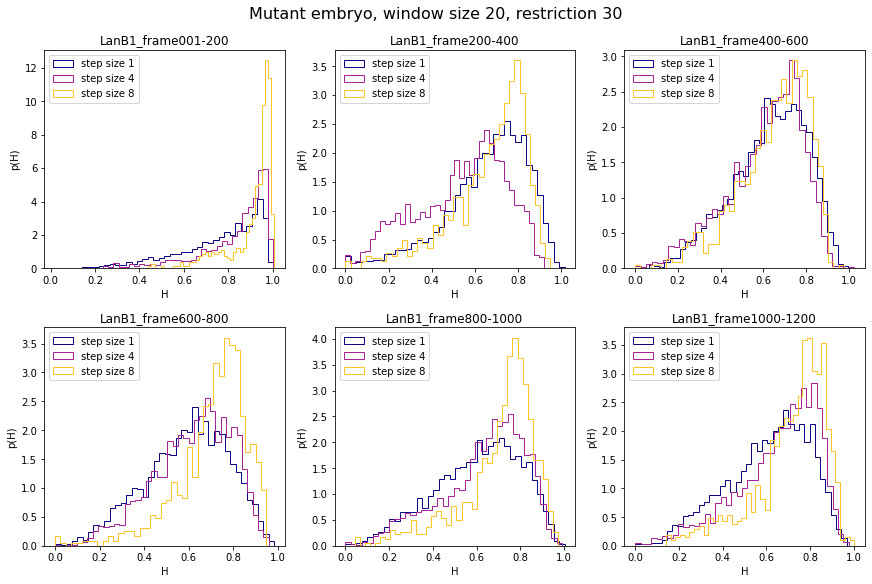

In [39]:
# Mutant embryo 2D histogram plots

window = 20
step_sizes = [1,2,3,4,5,6,7,8]
plot_ss = [1,4,8]
restriction = 30
nbins = 40

fig, ax = plt.subplots(2, 3, figsize=(12, 8), constrained_layout=True)

fig.suptitle("Mutant embryo, window size "+str(window)+", restriction "+str(restriction), fontsize=16)

subplot_hist_2d(filenames_mutant[0], window, step_sizes, plot_ss, restriction, nbins, [0,0])
subplot_hist_2d(filenames_mutant[1], window, step_sizes, plot_ss, restriction, nbins, [0,1])
subplot_hist_2d(filenames_mutant[2], window, step_sizes, plot_ss, restriction, nbins, [0,2])
subplot_hist_2d(filenames_mutant[3], window, step_sizes, plot_ss, restriction, nbins, [1,0])
subplot_hist_2d(filenames_mutant[4], window, step_sizes, plot_ss, restriction, nbins, [1,1])
subplot_hist_2d(filenames_mutant[5], window, step_sizes, plot_ss, restriction, nbins, [1,2])

plt.savefig("hist_2d_LanB1_w{}_s{}_r{}_n{}".format(window, max(step_sizes), restriction, nbins), dpi=300)

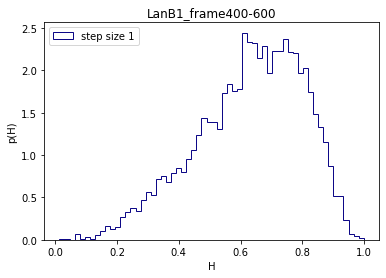

In [47]:
window = 20
step_sizes = [1,2,3,4,5,6,7,8]
restriction = 30
nbins = 60
plot_hist_2d('LanB1_frame400-600', window, step_sizes, [1], restriction, nbins)

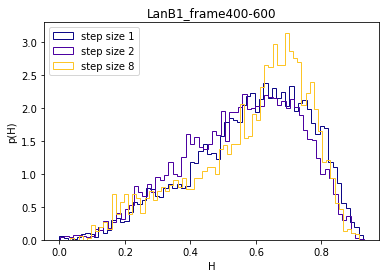

In [50]:
window = 13
step_sizes = [1,2,3,4,5,6,7,8]
restriction = 30
nbins = 70
plot_hist_2d('LanB1_frame400-600', window, step_sizes, [1, 2, 8], restriction, nbins)

In [54]:
def get_hist_h(h_dictionary, nbins):
    """
    """
    keys_list = list(h_dictionary)
    
    counts_all = np.empty((len(keys_list), nbins))
    bins_all = np.empty((len(keys_list), nbins+1))
    
    for i,key in enumerate(keys_list):
        counts, bins = np.histogram(h_dictionary[key], nbins, density=True)  # normalised so area under histogram is 1
        counts_all[i] = counts
        bins_all[i] = bins
    
    return counts_all, bins_all


def plot_3d(file_name, window, all_step_sizes, restriction, n_bins):
    
    h_dict = get_dict_from_file(file_name, window, all_step_sizes, restriction)
    
    %matplotlib notebook
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(projection="3d")
    cmap = plt.cm.plasma
    
    steps = [int(s) for s in list(h_dict)]
    yticks = np.array(steps)
    
    norm_counts, bins = get_hist_h(h_dict,n_bins)

    for i,_ in enumerate(steps):
        ytick = yticks[i]
        temp_counts = norm_counts[i]
        temp_bins = bins[i]
        xcenter = np.convolve(temp_bins, np.ones(2), "valid")/2
        xwidth = np.diff(temp_bins)
        ax.bar(left=xcenter, height=temp_counts, width=xwidth, zs=ytick,
               zdir="y", color=cmap(i/len(yticks)), alpha=0.7, edgecolor="grey", linewidth=0.3)
       

    ax.set_xlabel("H")
    ax.set_ylabel("downsampling step size")
    ax.set_zlabel("p(H)")

    ax.set_yticks(yticks)
    plt.show()
    
    return norm_counts, bins

<IPython.core.display.Javascript object>


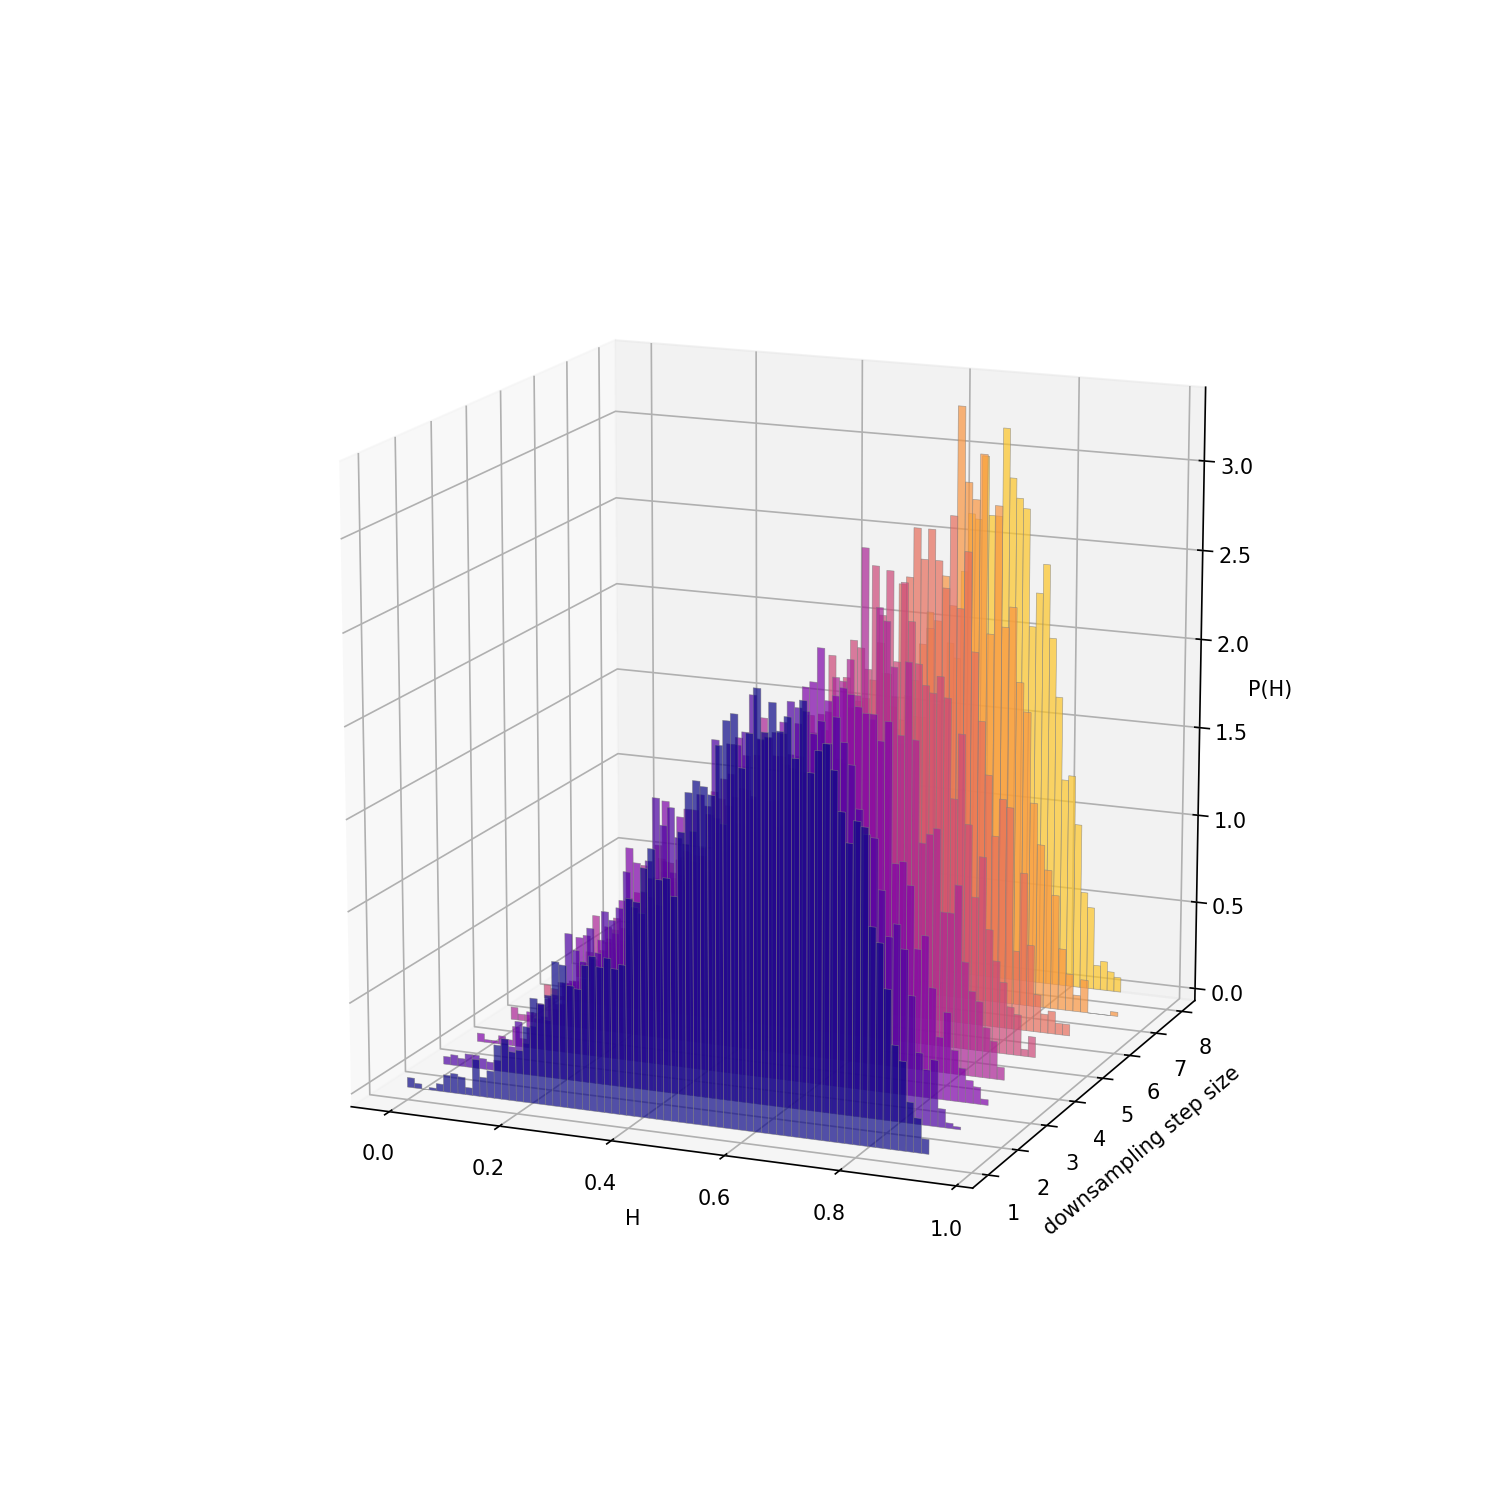

(array([[0.05356759, 0.02678379, 0.        , 0.0133919 , 0.04017569,
         0.09374328, 0.10713517, 0.09374328, 0.04017569, 0.20087845,
         0.10713517, 0.14731086, 0.29462173, 0.33479742, 0.26783794,
         0.28122983, 0.4151488 , 0.57585156, 0.54906777, 0.60263536,
         0.79012191, 0.77673001, 0.66959484, 0.65620294, 0.79012191,
         0.8436895 , 0.79012191, 0.8436895 , 0.79012191, 0.81690571,
         1.17848692, 1.16509502, 1.35258158, 1.45971675, 1.29901399,
         1.31240589, 1.21866261, 1.56685193, 1.78112228, 1.84808176,
         1.82129797, 1.78112228, 2.04896021, 2.18287918, 2.22305487,
         1.94182504, 2.12931159, 2.37036574, 2.14270349, 2.30340625,
         2.15609539, 2.23644677, 2.02217642, 2.33019004, 1.95521693,
         2.07574401, 2.1159197 , 1.98200073, 1.76773038, 1.60702762,
         1.72755469, 1.70077089, 1.17848692, 1.09813554, 0.8570814 ,
         0.56245967, 0.48210829, 0.26783794, 0.18748656, 0.08035138],
        [0.04336666, 0.05782222, 

In [55]:
plot_3d('LanB1_frame400-600', window, step_sizes, restriction, nbins)